## Import Packages

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import output
output.clear()

In [ ]:
!pip install pycaret[full]
output.clear()

In [ ]:
!apt-get -qq install -y Jinja2 

E: Unable to locate package Jinja2


In [ ]:
!pip install markupsafe==2.0.1
output.clear()

In [ ]:
!pip uninstall tornado
!pip install tornado==4.5.3
output.clear()

In [ ]:
import pandas as pd
from pandas import Series
import numpy as np
from datetime import date

from IPython.display import IFrame
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.graph_objects as go
import plotly.io as pio

import folium, webbrowser, IPython, warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## Data Load

In [ ]:
df = pd.read_csv("/content/drive/Shareddrives/2022-01_데이터마이닝이론및응용/0_텀프로젝트/데이터/텀프데이터셋최종.csv")

In [ ]:
df

,일자,시/군/구,연도,시설수,인구수,교통량,승하차,승차건수,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리,휴일여부
0,2019-01-01,강남구,2019,17,15439,74968.0,306117,37,201,1406,1046,32.8,2416,10404,0
1,2019-01-01,강동구,2019,13,17669,86442.0,124983,31,201,1406,1046,32.8,2416,10404,0
2,2019-01-01,강북구,2019,8,17517,46124.0,80664,38,201,1406,1046,32.8,2416,10404,0
3,2019-01-01,강서구,2019,17,28854,70420.0,120194,45,201,1406,1046,32.8,2416,10404,0
4,2019-01-01,관악구,2019,9,20299,38121.0,175446,12,201,1406,1046,32.8,2416,10404,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27395,2021-12-31,용산구,2021,6,7686,105349.0,173004,0,465,4047,3245,39.1,2221,8415,0
27396,2021-12-31,은평구,2021,10,21756,34332.0,287807,140,465,4047,3245,39.1,2221,8415,0
27397,2021-12-31,종로구,2021,4,5929,35276.0,476196,56,465,4047,3245,39.1,2221,8415,0
27398,2021-12-31,중구,2021,8,5634,29271.0,623220,16,465,4047,3245,39.1,2221,8415,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27400 entries, 0 to 27399
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일자      27400 non-null  object 
 1   시/군/구   27400 non-null  object 
 2   연도      27400 non-null  int64  
 3   시설수     27400 non-null  int64  
 4   인구수     27400 non-null  int64  
 5   교통량     27400 non-null  float64
 6   승하차     27400 non-null  int64  
 7   승차건수    27400 non-null  int64  
 8   차량운행    27400 non-null  int64  
 9   접수건     27400 non-null  int64  
 10  탑승건     27400 non-null  int64  
 11  평균대기시간  27400 non-null  float64
 12  평균요금    27400 non-null  int64  
 13  평균승차거리  27400 non-null  int64  
 14  휴일여부    27400 non-null  int64  
dtypes: float64(2), int64(11), object(2)
memory usage: 3.1+ MB


In [ ]:
df

,일자,시/군/구,연도,시설수,인구수,교통량,승하차,승차건수,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리,휴일여부
0,2019-01-01,강남구,2019,17,15439,74968.0,306117,37,201,1406,1046,32.8,2416,10404,0
1,2019-01-01,강동구,2019,13,17669,86442.0,124983,31,201,1406,1046,32.8,2416,10404,0
2,2019-01-01,강북구,2019,8,17517,46124.0,80664,38,201,1406,1046,32.8,2416,10404,0
3,2019-01-01,강서구,2019,17,28854,70420.0,120194,45,201,1406,1046,32.8,2416,10404,0
4,2019-01-01,관악구,2019,9,20299,38121.0,175446,12,201,1406,1046,32.8,2416,10404,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27395,2021-12-31,용산구,2021,6,7686,105349.0,173004,0,465,4047,3245,39.1,2221,8415,0
27396,2021-12-31,은평구,2021,10,21756,34332.0,287807,140,465,4047,3245,39.1,2221,8415,0
27397,2021-12-31,종로구,2021,4,5929,35276.0,476196,56,465,4047,3245,39.1,2221,8415,0
27398,2021-12-31,중구,2021,8,5634,29271.0,623220,16,465,4047,3245,39.1,2221,8415,0


In [ ]:
df = df.drop(['연도'], axis=1)
df

,일자,시/군/구,시설수,인구수,교통량,승하차,승차건수,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리,휴일여부
0,2019-01-01,강남구,17,15439,74968.0,306117,37,201,1406,1046,32.8,2416,10404,0
1,2019-01-01,강동구,13,17669,86442.0,124983,31,201,1406,1046,32.8,2416,10404,0
2,2019-01-01,강북구,8,17517,46124.0,80664,38,201,1406,1046,32.8,2416,10404,0
3,2019-01-01,강서구,17,28854,70420.0,120194,45,201,1406,1046,32.8,2416,10404,0
4,2019-01-01,관악구,9,20299,38121.0,175446,12,201,1406,1046,32.8,2416,10404,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27395,2021-12-31,용산구,6,7686,105349.0,173004,0,465,4047,3245,39.1,2221,8415,0
27396,2021-12-31,은평구,10,21756,34332.0,287807,140,465,4047,3245,39.1,2221,8415,0
27397,2021-12-31,종로구,4,5929,35276.0,476196,56,465,4047,3245,39.1,2221,8415,0
27398,2021-12-31,중구,8,5634,29271.0,623220,16,465,4047,3245,39.1,2221,8415,0


In [ ]:
df.columns

Index(['일자', '시/군/구', '시설수', '인구수', '교통량', '승하차', '승차건수', '차량운행', '접수건', '탑승건',
       '평균대기시간', '평균요금', '평균승차거리', '휴일여부'],
      dtype='object')

In [ ]:
df

,일자,시/군/구,시설수,인구수,교통량,승하차,승차건수,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리,휴일여부
0,2019-01-01,강남구,17,15439,74968.0,306117,37,201,1406,1046,32.8,2416,10404,0
1,2019-01-01,강동구,13,17669,86442.0,124983,31,201,1406,1046,32.8,2416,10404,0
2,2019-01-01,강북구,8,17517,46124.0,80664,38,201,1406,1046,32.8,2416,10404,0
3,2019-01-01,강서구,17,28854,70420.0,120194,45,201,1406,1046,32.8,2416,10404,0
4,2019-01-01,관악구,9,20299,38121.0,175446,12,201,1406,1046,32.8,2416,10404,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27395,2021-12-31,용산구,6,7686,105349.0,173004,0,465,4047,3245,39.1,2221,8415,0
27396,2021-12-31,은평구,10,21756,34332.0,287807,140,465,4047,3245,39.1,2221,8415,0
27397,2021-12-31,종로구,4,5929,35276.0,476196,56,465,4047,3245,39.1,2221,8415,0
27398,2021-12-31,중구,8,5634,29271.0,623220,16,465,4047,3245,39.1,2221,8415,0


In [ ]:
date = pd.DataFrame(df.일자.value_counts())
date

,일자
2019-01-01,25
2020-12-29,25
2021-01-04,25
2021-01-03,25
2021-01-02,25
...,...
2020-01-07,25
2020-01-08,25
2020-01-09,25
2020-01-10,25


In [ ]:
date[date['일자']!= 25]

,일자


In [ ]:
df[df['일자'] == '2019-01-01']

,일자,시/군/구,시설수,인구수,교통량,승하차,승차건수,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리,휴일여부
0,2019-01-01,강남구,17,15439,74968.0,306117,37,201,1406,1046,32.8,2416,10404,0
1,2019-01-01,강동구,13,17669,86442.0,124983,31,201,1406,1046,32.8,2416,10404,0
2,2019-01-01,강북구,8,17517,46124.0,80664,38,201,1406,1046,32.8,2416,10404,0
3,2019-01-01,강서구,17,28854,70420.0,120194,45,201,1406,1046,32.8,2416,10404,0
4,2019-01-01,관악구,9,20299,38121.0,175446,12,201,1406,1046,32.8,2416,10404,0
5,2019-01-01,광진구,9,12563,43813.0,244732,11,201,1406,1046,32.8,2416,10404,0
6,2019-01-01,구로구,8,18141,21447.0,167889,26,201,1406,1046,32.8,2416,10404,0
7,2019-01-01,금천구,6,11373,29438.0,23118,9,201,1406,1046,32.8,2416,10404,0
8,2019-01-01,노원구,27,27342,54178.0,172747,78,201,1406,1046,32.8,2416,10404,0
9,2019-01-01,도봉구,8,15450,19069.0,65715,8,201,1406,1046,32.8,2416,10404,0


In [ ]:
df[df['일자'] == '2019-01-02']

,일자,시/군/구,시설수,인구수,교통량,승하차,승차건수,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리,휴일여부
25,2019-01-02,강남구,17,15439,98356.0,1095124,40,428,5290,3583,36.1,2215,8445,0
26,2019-01-02,강동구,13,17669,91203.0,311289,124,428,5290,3583,36.1,2215,8445,0
27,2019-01-02,강북구,8,17517,52518.0,174051,138,428,5290,3583,36.1,2215,8445,0
28,2019-01-02,강서구,17,28854,85064.0,273025,136,428,5290,3583,36.1,2215,8445,0
29,2019-01-02,관악구,9,20299,45575.0,372446,46,428,5290,3583,36.1,2215,8445,0
30,2019-01-02,광진구,9,12563,63804.0,439687,38,428,5290,3583,36.1,2215,8445,0
31,2019-01-02,구로구,8,18141,25655.0,407714,44,428,5290,3583,36.1,2215,8445,0
32,2019-01-02,금천구,6,11373,39624.0,101152,10,428,5290,3583,36.1,2215,8445,0
33,2019-01-02,노원구,27,27342,57152.0,400028,318,428,5290,3583,36.1,2215,8445,0
34,2019-01-02,도봉구,8,15450,26412.0,149074,60,428,5290,3583,36.1,2215,8445,0


In [ ]:
df.head()

,일자,시/군/구,시설수,인구수,교통량,승하차,승차건수,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리,휴일여부
0,2019-01-01,강남구,17,15439,74968.0,306117,37,201,1406,1046,32.8,2416,10404,0
1,2019-01-01,강동구,13,17669,86442.0,124983,31,201,1406,1046,32.8,2416,10404,0
2,2019-01-01,강북구,8,17517,46124.0,80664,38,201,1406,1046,32.8,2416,10404,0
3,2019-01-01,강서구,17,28854,70420.0,120194,45,201,1406,1046,32.8,2416,10404,0
4,2019-01-01,관악구,9,20299,38121.0,175446,12,201,1406,1046,32.8,2416,10404,0


In [ ]:
df = df.groupby(['일자']).agg({'승차건수':'sum', '시설수' : 'sum', '인구수' : 'sum', '교통량':'sum',	'승하차' : 'sum',
                             	'차량운행':'mean',	'접수건':'mean',	'탑승건':'mean',	'평균대기시간':'mean', '평균요금':'mean',
                             	'평균승차거리' :'mean',	'휴일여부' : 'mean',	'승차건수' : 'sum'}).reset_index()

In [ ]:
df

,일자,승차건수,시설수,인구수,교통량,승하차,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리,휴일여부
0,2019-01-01,571,234,394843,1431481.0,4140136,201.0,1406.0,1046.0,32.8,2416.0,10404.0,0.0
1,2019-01-02,2040,234,394843,1686794.0,9735290,428.0,5290.0,3583.0,36.1,2215.0,8445.0,0.0
2,2019-01-03,2129,234,394843,1738752.3,10100077,426.0,5120.0,3772.0,41.1,2246.0,8665.0,0.0
3,2019-01-04,2050,234,394843,1757237.0,10552870,423.0,5065.0,3729.0,39.2,2228.0,8489.0,0.0
4,2019-01-05,822,234,394843,1658973.3,7535381,204.0,2039.0,1538.0,41.9,2414.0,10000.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2021-12-27,2147,234,392123,1571260.7,7494846,539.0,4502.0,3862.0,38.1,2181.0,8051.0,0.0
1092,2021-12-28,2255,234,392123,1583348.0,7889586,534.0,4742.0,4038.0,38.1,2181.0,8049.0,0.0
1093,2021-12-29,2165,234,392123,1639569.0,8113704,478.0,4723.0,3897.0,46.7,2189.0,8081.0,0.0
1094,2021-12-30,2089,234,392123,1667451.7,7970734,482.0,4463.0,3678.0,47.6,2228.0,8467.0,0.0


In [ ]:
df.index = df['일자']

In [ ]:
df = df.drop('일자', axis=1)

In [ ]:
df

,승차건수,시설수,인구수,교통량,승하차,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리,휴일여부
일자,,,,,,,,,,,,
2019-01-01,571,234,394843,1431481.0,4140136,201.0,1406.0,1046.0,32.8,2416.0,10404.0,0.0
2019-01-02,2040,234,394843,1686794.0,9735290,428.0,5290.0,3583.0,36.1,2215.0,8445.0,0.0
2019-01-03,2129,234,394843,1738752.3,10100077,426.0,5120.0,3772.0,41.1,2246.0,8665.0,0.0
2019-01-04,2050,234,394843,1757237.0,10552870,423.0,5065.0,3729.0,39.2,2228.0,8489.0,0.0
2019-01-05,822,234,394843,1658973.3,7535381,204.0,2039.0,1538.0,41.9,2414.0,10000.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,2147,234,392123,1571260.7,7494846,539.0,4502.0,3862.0,38.1,2181.0,8051.0,0.0
2021-12-28,2255,234,392123,1583348.0,7889586,534.0,4742.0,4038.0,38.1,2181.0,8049.0,0.0
2021-12-29,2165,234,392123,1639569.0,8113704,478.0,4723.0,3897.0,46.7,2189.0,8081.0,0.0


In [ ]:
df.columns

Index(['승차건수', '시설수', '인구수', '교통량', '승하차', '차량운행', '접수건', '탑승건', '평균대기시간',
       '평균요금', '평균승차거리', '휴일여부'],
      dtype='object')

In [ ]:
df.isnull().sum()

승차건수      0
시설수       0
인구수       0
교통량       0
승하차       0
차량운행      0
접수건       0
탑승건       0
평균대기시간    0
평균요금      0
평균승차거리    0
휴일여부      0
dtype: int64

In [ ]:
df

,승차건수,시설수,인구수,교통량,승하차,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리,휴일여부
일자,,,,,,,,,,,,
2019-01-01,571,234,394843,1431481.0,4140136,201.0,1406.0,1046.0,32.8,2416.0,10404.0,0.0
2019-01-02,2040,234,394843,1686794.0,9735290,428.0,5290.0,3583.0,36.1,2215.0,8445.0,0.0
2019-01-03,2129,234,394843,1738752.3,10100077,426.0,5120.0,3772.0,41.1,2246.0,8665.0,0.0
2019-01-04,2050,234,394843,1757237.0,10552870,423.0,5065.0,3729.0,39.2,2228.0,8489.0,0.0
2019-01-05,822,234,394843,1658973.3,7535381,204.0,2039.0,1538.0,41.9,2414.0,10000.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,2147,234,392123,1571260.7,7494846,539.0,4502.0,3862.0,38.1,2181.0,8051.0,0.0
2021-12-28,2255,234,392123,1583348.0,7889586,534.0,4742.0,4038.0,38.1,2181.0,8049.0,0.0
2021-12-29,2165,234,392123,1639569.0,8113704,478.0,4723.0,3897.0,46.7,2189.0,8081.0,0.0


In [ ]:
df = df.drop(['시설수', '인구수'], axis=1)
df

,승차건수,교통량,승하차,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리,휴일여부
일자,,,,,,,,,,
2019-01-01,571,1431481.0,4140136,201.0,1406.0,1046.0,32.8,2416.0,10404.0,0.0
2019-01-02,2040,1686794.0,9735290,428.0,5290.0,3583.0,36.1,2215.0,8445.0,0.0
2019-01-03,2129,1738752.3,10100077,426.0,5120.0,3772.0,41.1,2246.0,8665.0,0.0
2019-01-04,2050,1757237.0,10552870,423.0,5065.0,3729.0,39.2,2228.0,8489.0,0.0
2019-01-05,822,1658973.3,7535381,204.0,2039.0,1538.0,41.9,2414.0,10000.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,2147,1571260.7,7494846,539.0,4502.0,3862.0,38.1,2181.0,8051.0,0.0
2021-12-28,2255,1583348.0,7889586,534.0,4742.0,4038.0,38.1,2181.0,8049.0,0.0
2021-12-29,2165,1639569.0,8113704,478.0,4723.0,3897.0,46.7,2189.0,8081.0,0.0


## Train/Test Split

In [ ]:
# 2019~2021 5월:train
# 2021 6월~12월:test

In [ ]:
df

,승차건수,교통량,승하차,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리,휴일여부
일자,,,,,,,,,,
2019-01-01,571,1431481.0,4140136,201.0,1406.0,1046.0,32.8,2416.0,10404.0,0.0
2019-01-02,2040,1686794.0,9735290,428.0,5290.0,3583.0,36.1,2215.0,8445.0,0.0
2019-01-03,2129,1738752.3,10100077,426.0,5120.0,3772.0,41.1,2246.0,8665.0,0.0
2019-01-04,2050,1757237.0,10552870,423.0,5065.0,3729.0,39.2,2228.0,8489.0,0.0
2019-01-05,822,1658973.3,7535381,204.0,2039.0,1538.0,41.9,2414.0,10000.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,2147,1571260.7,7494846,539.0,4502.0,3862.0,38.1,2181.0,8051.0,0.0
2021-12-28,2255,1583348.0,7889586,534.0,4742.0,4038.0,38.1,2181.0,8049.0,0.0
2021-12-29,2165,1639569.0,8113704,478.0,4723.0,3897.0,46.7,2189.0,8081.0,0.0


In [ ]:
df = df.drop('휴일여부', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1096 entries, 2019-01-01 to 2021-12-31
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   승차건수    1096 non-null   int64  
 1   교통량     1096 non-null   float64
 2   승하차     1096 non-null   int64  
 3   차량운행    1096 non-null   float64
 4   접수건     1096 non-null   float64
 5   탑승건     1096 non-null   float64
 6   평균대기시간  1096 non-null   float64
 7   평균요금    1096 non-null   float64
 8   평균승차거리  1096 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 85.6+ KB


In [ ]:
df.columns

Index(['승차건수', '교통량', '승하차', '차량운행', '접수건', '탑승건', '평균대기시간', '평균요금', '평균승차거리'], dtype='object')

In [ ]:
df

,승차건수,교통량,승하차,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리
일자,,,,,,,,,
2019-01-01,571,1431481.0,4140136,201.0,1406.0,1046.0,32.8,2416.0,10404.0
2019-01-02,2040,1686794.0,9735290,428.0,5290.0,3583.0,36.1,2215.0,8445.0
2019-01-03,2129,1738752.3,10100077,426.0,5120.0,3772.0,41.1,2246.0,8665.0
2019-01-04,2050,1757237.0,10552870,423.0,5065.0,3729.0,39.2,2228.0,8489.0
2019-01-05,822,1658973.3,7535381,204.0,2039.0,1538.0,41.9,2414.0,10000.0
...,...,...,...,...,...,...,...,...,...
2021-12-27,2147,1571260.7,7494846,539.0,4502.0,3862.0,38.1,2181.0,8051.0
2021-12-28,2255,1583348.0,7889586,534.0,4742.0,4038.0,38.1,2181.0,8049.0
2021-12-29,2165,1639569.0,8113704,478.0,4723.0,3897.0,46.7,2189.0,8081.0


In [ ]:
test = df[df.index >= '2021-06-01']
test

,승차건수,교통량,승하차,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리
일자,,,,,,,,,
2021-06-01,2611,1664826.0,8121630,582.0,5326.0,4696.0,34.1,2216.0,8329.0
2021-06-02,2567,1682763.7,8220975,592.0,5154.0,4660.0,32.1,2211.0,8356.0
2021-06-03,2526,1649324.3,7963490,543.0,5280.0,4523.0,40.8,2194.0,8124.0
2021-06-04,2431,1741798.3,8557262,567.0,5038.0,4459.0,34.9,2224.0,8414.0
2021-06-05,909,1645128.0,5660018,297.0,2056.0,1809.0,32.2,2386.0,9852.0
...,...,...,...,...,...,...,...,...,...
2021-12-27,2147,1571260.7,7494846,539.0,4502.0,3862.0,38.1,2181.0,8051.0
2021-12-28,2255,1583348.0,7889586,534.0,4742.0,4038.0,38.1,2181.0,8049.0
2021-12-29,2165,1639569.0,8113704,478.0,4723.0,3897.0,46.7,2189.0,8081.0


In [ ]:
train = df[df.index < '2021-06-01']
train

,승차건수,교통량,승하차,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리
일자,,,,,,,,,
2019-01-01,571,1431481.0,4140136,201.0,1406.0,1046.0,32.8,2416.0,10404.0
2019-01-02,2040,1686794.0,9735290,428.0,5290.0,3583.0,36.1,2215.0,8445.0
2019-01-03,2129,1738752.3,10100077,426.0,5120.0,3772.0,41.1,2246.0,8665.0
2019-01-04,2050,1757237.0,10552870,423.0,5065.0,3729.0,39.2,2228.0,8489.0
2019-01-05,822,1658973.3,7535381,204.0,2039.0,1538.0,41.9,2414.0,10000.0
...,...,...,...,...,...,...,...,...,...
2021-05-27,2522,1654503.0,8085710,561.0,5169.0,4511.0,34.0,2197.0,8132.0
2021-05-28,2399,1647749.7,8292494,555.0,4954.0,4340.0,32.8,2164.0,7903.0
2021-05-29,913,1605601.3,5551537,299.0,1978.0,1799.0,28.4,2331.0,9461.0


In [ ]:
X_train = train.drop(['평균대기시간'], axis =1 ,inplace =False)
y_train = train['평균대기시간']

In [ ]:
X_train

,승차건수,교통량,승하차,차량운행,접수건,탑승건,평균요금,평균승차거리
일자,,,,,,,,
2019-01-01,571,1431481.0,4140136,201.0,1406.0,1046.0,2416.0,10404.0
2019-01-02,2040,1686794.0,9735290,428.0,5290.0,3583.0,2215.0,8445.0
2019-01-03,2129,1738752.3,10100077,426.0,5120.0,3772.0,2246.0,8665.0
2019-01-04,2050,1757237.0,10552870,423.0,5065.0,3729.0,2228.0,8489.0
2019-01-05,822,1658973.3,7535381,204.0,2039.0,1538.0,2414.0,10000.0
...,...,...,...,...,...,...,...,...
2021-05-27,2522,1654503.0,8085710,561.0,5169.0,4511.0,2197.0,8132.0
2021-05-28,2399,1647749.7,8292494,555.0,4954.0,4340.0,2164.0,7903.0
2021-05-29,913,1605601.3,5551537,299.0,1978.0,1799.0,2331.0,9461.0


In [ ]:
X_test = test.drop(['평균대기시간'],axis = 1,inplace =False)
y_test = test['평균대기시간']

In [ ]:
X_test

,승차건수,교통량,승하차,차량운행,접수건,탑승건,평균요금,평균승차거리
일자,,,,,,,,
2021-06-01,2611,1664826.0,8121630,582.0,5326.0,4696.0,2216.0,8329.0
2021-06-02,2567,1682763.7,8220975,592.0,5154.0,4660.0,2211.0,8356.0
2021-06-03,2526,1649324.3,7963490,543.0,5280.0,4523.0,2194.0,8124.0
2021-06-04,2431,1741798.3,8557262,567.0,5038.0,4459.0,2224.0,8414.0
2021-06-05,909,1645128.0,5660018,297.0,2056.0,1809.0,2386.0,9852.0
...,...,...,...,...,...,...,...,...
2021-12-27,2147,1571260.7,7494846,539.0,4502.0,3862.0,2181.0,8051.0
2021-12-28,2255,1583348.0,7889586,534.0,4742.0,4038.0,2181.0,8049.0
2021-12-29,2165,1639569.0,8113704,478.0,4723.0,3897.0,2189.0,8081.0


In [ ]:
y_test

일자
2021-06-01    34.1
2021-06-02    32.1
2021-06-03    40.8
2021-06-04    34.9
2021-06-05    32.2
              ... 
2021-12-27    38.1
2021-12-28    38.1
2021-12-29    46.7
2021-12-30    47.6
2021-12-31    39.1
Name: 평균대기시간, Length: 214, dtype: float64

In [ ]:
test_10_up = X_test.copy()
test_10_up['차량운행'] = X_test['차량운행'] + 10

test_20_up = X_test.copy()
test_20_up['차량운행'] = X_test['차량운행'] + 20

test_30_up = X_test.copy()
test_30_up['차량운행'] = X_test['차량운행'] + 30

test_40_up = X_test.copy()
test_40_up['차량운행'] = X_test['차량운행'] + 40

test_50_up = X_test.copy()
test_50_up['차량운행'] = X_test['차량운행'] + 50

test_60_up = X_test.copy()
test_60_up['차량운행'] = X_test['차량운행'] + 60

In [ ]:
X_test

,승차건수,교통량,승하차,차량운행,접수건,탑승건,평균요금,평균승차거리
일자,,,,,,,,
2021-06-01,2611,1664826.0,8121630,582.0,5326.0,4696.0,2216.0,8329.0
2021-06-02,2567,1682763.7,8220975,592.0,5154.0,4660.0,2211.0,8356.0
2021-06-03,2526,1649324.3,7963490,543.0,5280.0,4523.0,2194.0,8124.0
2021-06-04,2431,1741798.3,8557262,567.0,5038.0,4459.0,2224.0,8414.0
2021-06-05,909,1645128.0,5660018,297.0,2056.0,1809.0,2386.0,9852.0
...,...,...,...,...,...,...,...,...
2021-12-27,2147,1571260.7,7494846,539.0,4502.0,3862.0,2181.0,8051.0
2021-12-28,2255,1583348.0,7889586,534.0,4742.0,4038.0,2181.0,8049.0
2021-12-29,2165,1639569.0,8113704,478.0,4723.0,3897.0,2189.0,8081.0


In [ ]:
test_60_up

,승차건수,교통량,승하차,차량운행,접수건,탑승건,평균요금,평균승차거리
일자,,,,,,,,
2021-06-01,2611,1664826.0,8121630,642.0,5326.0,4696.0,2216.0,8329.0
2021-06-02,2567,1682763.7,8220975,652.0,5154.0,4660.0,2211.0,8356.0
2021-06-03,2526,1649324.3,7963490,603.0,5280.0,4523.0,2194.0,8124.0
2021-06-04,2431,1741798.3,8557262,627.0,5038.0,4459.0,2224.0,8414.0
2021-06-05,909,1645128.0,5660018,357.0,2056.0,1809.0,2386.0,9852.0
...,...,...,...,...,...,...,...,...
2021-12-27,2147,1571260.7,7494846,599.0,4502.0,3862.0,2181.0,8051.0
2021-12-28,2255,1583348.0,7889586,594.0,4742.0,4038.0,2181.0,8049.0
2021-12-29,2165,1639569.0,8113704,538.0,4723.0,3897.0,2189.0,8081.0


In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_train_std = standard_scaler.fit_transform(X_train)
X_test_std = standard_scaler.transform(X_test)

test_10_up_std = standard_scaler.transform(test_10_up)
test_20_up_std = standard_scaler.transform(test_20_up)
test_30_up_std = standard_scaler.transform(test_30_up)
test_40_up_std = standard_scaler.transform(test_40_up)
test_50_up_std = standard_scaler.transform(test_50_up)
test_60_up_std = standard_scaler.transform(test_60_up)

In [ ]:
X_train_std = pd.DataFrame(X_train_std, columns = X_train.columns)
X_test_std = pd.DataFrame(X_test_std, columns = X_test.columns)
test_10_up_std = pd.DataFrame(test_10_up_std, columns = X_test.columns)
test_20_up_std = pd.DataFrame(test_20_up_std, columns = X_test.columns)
test_30_up_std = pd.DataFrame(test_30_up_std, columns = X_test.columns)
test_40_up_std = pd.DataFrame(test_40_up_std, columns = X_test.columns)
test_50_up_std = pd.DataFrame(test_50_up_std, columns = X_test.columns)
test_60_up_std = pd.DataFrame(test_60_up_std, columns = X_test.columns)

In [ ]:
X_train_std.index = train.index
X_train_std

,승차건수,교통량,승하차,차량운행,접수건,탑승건,평균요금,평균승차거리
일자,,,,,,,,
2019-01-01,-1.554972,-1.564589,-1.523130,-1.683927,-1.467238,-1.610467,1.053073,1.334928
2019-01-02,0.552209,0.379561,0.818868,0.062327,1.122288,0.493805,-0.855500,-0.754535
2019-01-03,0.679874,0.775211,0.971559,0.046941,1.008947,0.650568,-0.561143,-0.519884
2019-01-04,0.566554,0.915968,1.161087,0.023863,0.972277,0.614902,-0.732060,-0.707605
2019-01-05,-1.194929,0.167713,-0.101962,-1.660849,-1.045206,-1.202386,1.034083,0.904023
...,...,...,...,...,...,...,...,...
2021-05-27,1.243606,0.133672,0.128393,1.085463,1.041616,1.263519,-1.026417,-1.088380
2021-05-28,1.067171,0.082247,0.214948,1.039306,0.898272,1.121686,-1.339765,-1.332631
2021-05-29,-1.064396,-0.238703,-0.932351,-0.930038,-1.085876,-0.985904,0.245965,0.329127


In [ ]:
X_train_std['휴일여부'] = X_train_std.index
X_train_std

,승차건수,교통량,승하차,차량운행,접수건,탑승건,평균요금,평균승차거리,휴일여부
일자,,,,,,,,,
2019-01-01,-1.554972,-1.564589,-1.523130,-1.683927,-1.467238,-1.610467,1.053073,1.334928,2019-01-01
2019-01-02,0.552209,0.379561,0.818868,0.062327,1.122288,0.493805,-0.855500,-0.754535,2019-01-02
2019-01-03,0.679874,0.775211,0.971559,0.046941,1.008947,0.650568,-0.561143,-0.519884,2019-01-03
2019-01-04,0.566554,0.915968,1.161087,0.023863,0.972277,0.614902,-0.732060,-0.707605,2019-01-04
2019-01-05,-1.194929,0.167713,-0.101962,-1.660849,-1.045206,-1.202386,1.034083,0.904023,2019-01-05
...,...,...,...,...,...,...,...,...,...
2021-05-27,1.243606,0.133672,0.128393,1.085463,1.041616,1.263519,-1.026417,-1.088380,2021-05-27
2021-05-28,1.067171,0.082247,0.214948,1.039306,0.898272,1.121686,-1.339765,-1.332631,2021-05-28
2021-05-29,-1.064396,-0.238703,-0.932351,-0.930038,-1.085876,-0.985904,0.245965,0.329127,2021-05-29


In [ ]:
from datetime import date

def is_weekend(d):
    return d.weekday() > 4

In [ ]:
import datetime
X_train_std['휴일여부'] = pd.to_datetime(X_train_std['휴일여부'])

In [ ]:
X_train_std['휴일 여부'] = ''

for i in range(len(X_train_std)):
  X_train_std['휴일 여부'][i] = is_weekend(X_train_std['휴일여부'][i])

In [ ]:
X_train_std = X_train_std.replace(True, 1)
X_train_std = X_train_std.replace(False, 0)

In [ ]:
X_train_std = X_train_std.drop('휴일여부', axis=1)

In [ ]:
X_train_std

,승차건수,교통량,승하차,차량운행,접수건,탑승건,평균요금,평균승차거리,휴일 여부
일자,,,,,,,,,
2019-01-01,-1.554972,-1.564589,-1.523130,-1.683927,-1.467238,-1.610467,1.053073,1.334928,0
2019-01-02,0.552209,0.379561,0.818868,0.062327,1.122288,0.493805,-0.855500,-0.754535,0
2019-01-03,0.679874,0.775211,0.971559,0.046941,1.008947,0.650568,-0.561143,-0.519884,0
2019-01-04,0.566554,0.915968,1.161087,0.023863,0.972277,0.614902,-0.732060,-0.707605,0
2019-01-05,-1.194929,0.167713,-0.101962,-1.660849,-1.045206,-1.202386,1.034083,0.904023,1
...,...,...,...,...,...,...,...,...,...
2021-05-27,1.243606,0.133672,0.128393,1.085463,1.041616,1.263519,-1.026417,-1.088380,0
2021-05-28,1.067171,0.082247,0.214948,1.039306,0.898272,1.121686,-1.339765,-1.332631,0
2021-05-29,-1.064396,-0.238703,-0.932351,-0.930038,-1.085876,-0.985904,0.245965,0.329127,1


In [ ]:
X_test_std.index = test.index
X_test_std['휴일여부'] = X_test_std.index
X_test_std['휴일여부'] = pd.to_datetime(X_test_std['휴일여부'])
X_test_std['휴일 여부'] = ''
for i in range(len(X_test_std)):
  X_test_std['휴일 여부'][i] = is_weekend(X_test_std['휴일여부'][i])
X_test_std = X_test_std.replace(True, 1)
X_test_std = X_test_std.replace(False, 0)
X_test_std = X_test_std.drop('휴일여부', axis=1)
X_test_std

,승차건수,교통량,승하차,차량운행,접수건,탑승건,평균요금,평균승차거리,휴일 여부
일자,,,,,,,,,
2021-06-01,1.371270,0.212280,0.143428,1.247010,1.146290,1.416964,-0.846005,-0.878260,0
2021-06-02,1.308155,0.348871,0.185012,1.323938,1.031615,1.387105,-0.893482,-0.849462,0
2021-06-03,1.249344,0.094238,0.077234,0.946993,1.115621,1.273472,-1.054904,-1.096913,0
2021-06-04,1.113072,0.798406,0.325773,1.131619,0.954276,1.220389,-0.770042,-0.787600,0
2021-06-05,-1.070134,0.062284,-0.886944,-0.945423,-1.033872,-0.977609,0.768212,0.746167,1
...,...,...,...,...,...,...,...,...,...
2021-12-27,0.705694,-0.500199,-0.118929,0.916222,0.596916,0.725217,-1.178344,-1.174774,0
2021-12-28,0.860612,-0.408157,0.046300,0.877758,0.756928,0.871197,-1.178344,-1.176907,0
2021-12-29,0.731513,0.019953,0.140110,0.446964,0.744260,0.754247,-1.102381,-1.142776,0


In [ ]:
test_10_up_std.index = test.index
test_10_up_std['휴일여부'] = test_10_up_std.index
test_10_up_std['휴일여부'] = pd.to_datetime(test_10_up_std['휴일여부'])
test_10_up_std['휴일 여부'] = ''
for i in range(len(test_10_up_std)):
  test_10_up_std['휴일 여부'][i] = is_weekend(test_10_up_std['휴일여부'][i])
test_10_up_std = test_10_up_std.replace(True, 1)
test_10_up_std = test_10_up_std.replace(False, 0)
test_10_up_std = test_10_up_std.drop('휴일여부', axis=1)
test_10_up_std

,승차건수,교통량,승하차,차량운행,접수건,탑승건,평균요금,평균승차거리,휴일 여부
일자,,,,,,,,,
2021-06-01,1.371270,0.212280,0.143428,1.323938,1.146290,1.416964,-0.846005,-0.878260,0
2021-06-02,1.308155,0.348871,0.185012,1.400865,1.031615,1.387105,-0.893482,-0.849462,0
2021-06-03,1.249344,0.094238,0.077234,1.023921,1.115621,1.273472,-1.054904,-1.096913,0
2021-06-04,1.113072,0.798406,0.325773,1.208547,0.954276,1.220389,-0.770042,-0.787600,0
2021-06-05,-1.070134,0.062284,-0.886944,-0.868496,-1.033872,-0.977609,0.768212,0.746167,1
...,...,...,...,...,...,...,...,...,...
2021-12-27,0.705694,-0.500199,-0.118929,0.993150,0.596916,0.725217,-1.178344,-1.174774,0
2021-12-28,0.860612,-0.408157,0.046300,0.954686,0.756928,0.871197,-1.178344,-1.176907,0
2021-12-29,0.731513,0.019953,0.140110,0.523892,0.744260,0.754247,-1.102381,-1.142776,0


In [ ]:
test_20_up_std.index = test.index
test_20_up_std['휴일여부'] = test_20_up_std.index
test_20_up_std['휴일여부'] = pd.to_datetime(test_20_up_std['휴일여부'])
test_20_up_std['휴일 여부'] = ''
for i in range(len(test_20_up_std)):
  test_20_up_std['휴일 여부'][i] = is_weekend(test_20_up_std['휴일여부'][i])
test_20_up_std = test_20_up_std.replace(True, 1)
test_20_up_std = test_20_up_std.replace(False, 0)
test_20_up_std = test_20_up_std.drop('휴일여부', axis=1)
test_20_up_std

,승차건수,교통량,승하차,차량운행,접수건,탑승건,평균요금,평균승차거리,휴일 여부
일자,,,,,,,,,
2021-06-01,1.371270,0.212280,0.143428,1.400865,1.146290,1.416964,-0.846005,-0.878260,0
2021-06-02,1.308155,0.348871,0.185012,1.477793,1.031615,1.387105,-0.893482,-0.849462,0
2021-06-03,1.249344,0.094238,0.077234,1.100848,1.115621,1.273472,-1.054904,-1.096913,0
2021-06-04,1.113072,0.798406,0.325773,1.285474,0.954276,1.220389,-0.770042,-0.787600,0
2021-06-05,-1.070134,0.062284,-0.886944,-0.791568,-1.033872,-0.977609,0.768212,0.746167,1
...,...,...,...,...,...,...,...,...,...
2021-12-27,0.705694,-0.500199,-0.118929,1.070077,0.596916,0.725217,-1.178344,-1.174774,0
2021-12-28,0.860612,-0.408157,0.046300,1.031613,0.756928,0.871197,-1.178344,-1.176907,0
2021-12-29,0.731513,0.019953,0.140110,0.600819,0.744260,0.754247,-1.102381,-1.142776,0


In [ ]:
test_30_up_std.index = test.index
test_30_up_std['휴일여부'] = test_30_up_std.index
test_30_up_std['휴일여부'] = pd.to_datetime(test_30_up_std['휴일여부'])
test_30_up_std['휴일 여부'] = ''
for i in range(len(test_30_up_std)):
  test_30_up_std['휴일 여부'][i] = is_weekend(test_30_up_std['휴일여부'][i])
test_30_up_std = test_30_up_std.replace(True, 1)
test_30_up_std = test_30_up_std.replace(False, 0)
test_30_up_std = test_30_up_std.drop('휴일여부', axis=1)
test_30_up_std

,승차건수,교통량,승하차,차량운행,접수건,탑승건,평균요금,평균승차거리,휴일 여부
일자,,,,,,,,,
2021-06-01,1.371270,0.212280,0.143428,1.477793,1.146290,1.416964,-0.846005,-0.878260,0
2021-06-02,1.308155,0.348871,0.185012,1.554720,1.031615,1.387105,-0.893482,-0.849462,0
2021-06-03,1.249344,0.094238,0.077234,1.177776,1.115621,1.273472,-1.054904,-1.096913,0
2021-06-04,1.113072,0.798406,0.325773,1.362402,0.954276,1.220389,-0.770042,-0.787600,0
2021-06-05,-1.070134,0.062284,-0.886944,-0.714641,-1.033872,-0.977609,0.768212,0.746167,1
...,...,...,...,...,...,...,...,...,...
2021-12-27,0.705694,-0.500199,-0.118929,1.147005,0.596916,0.725217,-1.178344,-1.174774,0
2021-12-28,0.860612,-0.408157,0.046300,1.108541,0.756928,0.871197,-1.178344,-1.176907,0
2021-12-29,0.731513,0.019953,0.140110,0.677747,0.744260,0.754247,-1.102381,-1.142776,0


In [ ]:
test_40_up_std.index = test.index
test_40_up_std['휴일여부'] = test_40_up_std.index
test_40_up_std['휴일여부'] = pd.to_datetime(test_40_up_std['휴일여부'])
test_40_up_std['휴일 여부'] = ''
for i in range(len(test_40_up_std)):
  test_40_up_std['휴일 여부'][i] = is_weekend(test_40_up_std['휴일여부'][i])
test_40_up_std = test_40_up_std.replace(True, 1)
test_40_up_std = test_40_up_std.replace(False, 0)
test_40_up_std = test_40_up_std.drop('휴일여부', axis=1)
test_40_up_std

,승차건수,교통량,승하차,차량운행,접수건,탑승건,평균요금,평균승차거리,휴일 여부
일자,,,,,,,,,
2021-06-01,1.371270,0.212280,0.143428,1.554720,1.146290,1.416964,-0.846005,-0.878260,0
2021-06-02,1.308155,0.348871,0.185012,1.631648,1.031615,1.387105,-0.893482,-0.849462,0
2021-06-03,1.249344,0.094238,0.077234,1.254703,1.115621,1.273472,-1.054904,-1.096913,0
2021-06-04,1.113072,0.798406,0.325773,1.439329,0.954276,1.220389,-0.770042,-0.787600,0
2021-06-05,-1.070134,0.062284,-0.886944,-0.637713,-1.033872,-0.977609,0.768212,0.746167,1
...,...,...,...,...,...,...,...,...,...
2021-12-27,0.705694,-0.500199,-0.118929,1.223932,0.596916,0.725217,-1.178344,-1.174774,0
2021-12-28,0.860612,-0.408157,0.046300,1.185468,0.756928,0.871197,-1.178344,-1.176907,0
2021-12-29,0.731513,0.019953,0.140110,0.754674,0.744260,0.754247,-1.102381,-1.142776,0


In [ ]:
test_50_up_std.index = test.index
test_50_up_std['휴일여부'] = test_50_up_std.index
test_50_up_std['휴일여부'] = pd.to_datetime(test_50_up_std['휴일여부'])
test_50_up_std['휴일 여부'] = ''
for i in range(len(test_50_up_std)):
  test_50_up_std['휴일 여부'][i] = is_weekend(test_50_up_std['휴일여부'][i])
test_50_up_std = test_50_up_std.replace(True, 1)
test_50_up_std = test_50_up_std.replace(False, 0)
test_50_up_std = test_50_up_std.drop('휴일여부', axis=1)
test_50_up_std

,승차건수,교통량,승하차,차량운행,접수건,탑승건,평균요금,평균승차거리,휴일 여부
일자,,,,,,,,,
2021-06-01,1.371270,0.212280,0.143428,1.631648,1.146290,1.416964,-0.846005,-0.878260,0
2021-06-02,1.308155,0.348871,0.185012,1.708575,1.031615,1.387105,-0.893482,-0.849462,0
2021-06-03,1.249344,0.094238,0.077234,1.331631,1.115621,1.273472,-1.054904,-1.096913,0
2021-06-04,1.113072,0.798406,0.325773,1.516257,0.954276,1.220389,-0.770042,-0.787600,0
2021-06-05,-1.070134,0.062284,-0.886944,-0.560786,-1.033872,-0.977609,0.768212,0.746167,1
...,...,...,...,...,...,...,...,...,...
2021-12-27,0.705694,-0.500199,-0.118929,1.300860,0.596916,0.725217,-1.178344,-1.174774,0
2021-12-28,0.860612,-0.408157,0.046300,1.262396,0.756928,0.871197,-1.178344,-1.176907,0
2021-12-29,0.731513,0.019953,0.140110,0.831602,0.744260,0.754247,-1.102381,-1.142776,0


In [ ]:
test_60_up_std.index = test.index
test_60_up_std['휴일여부'] = test_60_up_std.index
test_60_up_std['휴일여부'] = pd.to_datetime(test_60_up_std['휴일여부'])
test_60_up_std['휴일 여부'] = ''
for i in range(len(test_60_up_std)):
  test_60_up_std['휴일 여부'][i] = is_weekend(test_60_up_std['휴일여부'][i])
test_60_up_std = test_60_up_std.replace(True, 1)
test_60_up_std = test_60_up_std.replace(False, 0)
test_60_up_std = test_60_up_std.drop('휴일여부', axis=1)
test_60_up_std

,승차건수,교통량,승하차,차량운행,접수건,탑승건,평균요금,평균승차거리,휴일 여부
일자,,,,,,,,,
2021-06-01,1.371270,0.212280,0.143428,1.708575,1.146290,1.416964,-0.846005,-0.878260,0
2021-06-02,1.308155,0.348871,0.185012,1.785503,1.031615,1.387105,-0.893482,-0.849462,0
2021-06-03,1.249344,0.094238,0.077234,1.408558,1.115621,1.273472,-1.054904,-1.096913,0
2021-06-04,1.113072,0.798406,0.325773,1.593184,0.954276,1.220389,-0.770042,-0.787600,0
2021-06-05,-1.070134,0.062284,-0.886944,-0.483858,-1.033872,-0.977609,0.768212,0.746167,1
...,...,...,...,...,...,...,...,...,...
2021-12-27,0.705694,-0.500199,-0.118929,1.377787,0.596916,0.725217,-1.178344,-1.174774,0
2021-12-28,0.860612,-0.408157,0.046300,1.339323,0.756928,0.871197,-1.178344,-1.176907,0
2021-12-29,0.731513,0.019953,0.140110,0.908529,0.744260,0.754247,-1.102381,-1.142776,0


## Pycaret

In [ ]:
X_train_std

,승차건수,교통량,승하차,차량운행,접수건,탑승건,평균요금,평균승차거리,휴일 여부
일자,,,,,,,,,
2019-01-01,-1.554972,-1.564589,-1.523130,-1.683927,-1.467238,-1.610467,1.053073,1.334928,0
2019-01-02,0.552209,0.379561,0.818868,0.062327,1.122288,0.493805,-0.855500,-0.754535,0
2019-01-03,0.679874,0.775211,0.971559,0.046941,1.008947,0.650568,-0.561143,-0.519884,0
2019-01-04,0.566554,0.915968,1.161087,0.023863,0.972277,0.614902,-0.732060,-0.707605,0
2019-01-05,-1.194929,0.167713,-0.101962,-1.660849,-1.045206,-1.202386,1.034083,0.904023,1
...,...,...,...,...,...,...,...,...,...
2021-05-27,1.243606,0.133672,0.128393,1.085463,1.041616,1.263519,-1.026417,-1.088380,0
2021-05-28,1.067171,0.082247,0.214948,1.039306,0.898272,1.121686,-1.339765,-1.332631,0
2021-05-29,-1.064396,-0.238703,-0.932351,-0.930038,-1.085876,-0.985904,0.245965,0.329127,1


In [ ]:
y_train

일자
2019-01-01    32.8
2019-01-02    36.1
2019-01-03    41.1
2019-01-04    39.2
2019-01-05    41.9
              ... 
2021-05-27    34.0
2021-05-28    32.8
2021-05-29    28.4
2021-05-30    23.3
2021-05-31    29.3
Name: 평균대기시간, Length: 882, dtype: float64

In [ ]:
train_std = X_train_std.copy()

In [ ]:
train_std['평균대기시간'] = y_train
train_std

,승차건수,교통량,승하차,차량운행,접수건,탑승건,평균요금,평균승차거리,휴일 여부,평균대기시간
일자,,,,,,,,,,
2019-01-01,-1.554972,-1.564589,-1.523130,-1.683927,-1.467238,-1.610467,1.053073,1.334928,0,32.8
2019-01-02,0.552209,0.379561,0.818868,0.062327,1.122288,0.493805,-0.855500,-0.754535,0,36.1
2019-01-03,0.679874,0.775211,0.971559,0.046941,1.008947,0.650568,-0.561143,-0.519884,0,41.1
2019-01-04,0.566554,0.915968,1.161087,0.023863,0.972277,0.614902,-0.732060,-0.707605,0,39.2
2019-01-05,-1.194929,0.167713,-0.101962,-1.660849,-1.045206,-1.202386,1.034083,0.904023,1,41.9
...,...,...,...,...,...,...,...,...,...,...
2021-05-27,1.243606,0.133672,0.128393,1.085463,1.041616,1.263519,-1.026417,-1.088380,0,34.0
2021-05-28,1.067171,0.082247,0.214948,1.039306,0.898272,1.121686,-1.339765,-1.332631,0,32.8
2021-05-29,-1.064396,-0.238703,-0.932351,-0.930038,-1.085876,-0.985904,0.245965,0.329127,1,28.4


In [ ]:
import jinja2

In [ ]:
from pycaret.regression import *

In [ ]:
train_std.isnull().sum()

승차건수      0
교통량       0
승하차       0
차량운행      0
접수건       0
탑승건       0
평균요금      0
평균승차거리    0
휴일 여부     0
평균대기시간    0
dtype: int64

In [ ]:
train_std.info()

<class 'pandas.core.frame.DataFrame'>
Index: 882 entries, 2019-01-01 to 2021-05-31
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   승차건수    882 non-null    float64
 1   교통량     882 non-null    float64
 2   승하차     882 non-null    float64
 3   차량운행    882 non-null    float64
 4   접수건     882 non-null    float64
 5   탑승건     882 non-null    float64
 6   평균요금    882 non-null    float64
 7   평균승차거리  882 non-null    float64
 8   휴일 여부   882 non-null    int64  
 9   평균대기시간  882 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 108.1+ KB


In [ ]:
reg = setup(train_std, target = '평균대기시간', train_size=0.8, data_split_shuffle = True)

,Description,Value
0,session_id,1838
1,Target,평균대기시간
2,Original Data,"(882, 10)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(705, 7)"


In [ ]:
#모델 비교의 경우 기본적으로 K-Fold CV로 값을 비교하게 된다.(K=10)
#본 과업에서의 평가지표는 'RMSE' 이기 때문에 해당 지표를 기준으로 내림차순을 설정해 비교했다. 

best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,3.8556,32.6755,5.6310,0.8666,0.1249,0.0963,0.456
catboost,CatBoost Regressor,3.8986,34.0387,5.7511,0.8621,0.1314,0.0987,2.678
knn,K Neighbors Regressor,4.0606,35.3823,5.9018,0.8578,0.1360,0.1026,0.061
rf,Random Forest Regressor,3.9781,36.0240,5.9044,0.8542,0.1334,0.0999,0.559
lightgbm,Light Gradient Boosting Machine,4.1134,36.6224,5.9594,0.8507,0.1357,0.1052,0.066
gbr,Gradient Boosting Regressor,4.2406,37.7556,6.0679,0.8464,0.1392,0.1082,0.119
xgboost,Extreme Gradient Boosting,4.1796,38.1727,6.0934,0.8431,0.1389,0.1056,0.406
ridge,Ridge Regression,5.6514,57.4238,7.5361,0.7688,0.2215,0.1636,0.013
br,Bayesian Ridge,5.6524,57.4709,7.5390,0.7686,0.2215,0.1637,0.012
ada,AdaBoost Regressor,6.3236,57.4972,7.5463,0.7662,0.2135,0.2012,0.101


In [ ]:
et = create_model('et', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.5017,30.9551,5.5637,0.8737,0.1179,0.0862


In [ ]:
tuned_et = tune_model(et, optimize = 'RMSE', n_iter = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.8095,28.0299,5.2943,0.8805,0.1446,0.1211
1,3.8123,24.7215,4.9721,0.8908,0.1388,0.1159
2,4.7537,42.0923,6.4879,0.7947,0.1509,0.1167
3,4.4735,44.8426,6.6965,0.8103,0.1576,0.1172
4,4.8072,41.5383,6.4450,0.8260,0.1524,0.1306
5,5.5216,59.7087,7.7271,0.7842,0.1714,0.1418
6,3.9718,28.0693,5.2980,0.8923,0.1314,0.1051
7,5.6002,66.0377,8.1264,0.7716,0.1745,0.1437
8,4.6954,50.1487,7.0816,0.8030,0.1475,0.1150


In [ ]:
rf = create_model('rf', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.4703,28.9956,5.3848,0.8817,0.1149,0.0857


In [ ]:
tuned_rf = tune_model(rf, optimize = 'RMSE', n_iter = 10) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.6350,25.2878,5.0287,0.8922,0.1345,0.1098
1,3.6841,22.4529,4.7384,0.9008,0.1302,0.1096
2,4.5090,41.1472,6.4146,0.7993,0.1544,0.1139
3,5.0217,55.6336,7.4588,0.7646,0.1761,0.1298
4,4.2410,32.4828,5.6994,0.8639,0.1330,0.1128
5,4.6181,49.4142,7.0295,0.8214,0.1499,0.1151
6,3.4799,21.6918,4.6574,0.9168,0.1170,0.0914
7,5.1055,53.0559,7.2839,0.8165,0.1665,0.1364
8,4.5631,48.9932,6.9995,0.8076,0.1374,0.1073


In [ ]:
cat = create_model('catboost', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.5636,29.2655,5.4098,0.8806,0.1155,0.0882


In [ ]:
#튜닝 방법은 일반적으로 Random Grid를 iter(default=10)만큼 최적화 시킨다.
tuned_cat = tune_model(cat, optimize = 'RMSE', n_iter = 20)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.3002,23.4517,4.8427,0.9001,0.1259,0.0953
1,3.3130,20.5565,4.5339,0.9092,0.1182,0.0922
2,4.2762,42.9903,6.5567,0.7904,0.1454,0.1028
3,4.2103,42.7802,6.5407,0.8190,0.1569,0.1092
4,3.8192,31.9855,5.6556,0.8660,0.1250,0.0983
5,4.0263,46.3343,6.8069,0.8325,0.1416,0.0944
6,3.3163,20.4640,4.5237,0.9215,0.1088,0.0828
7,4.2811,37.1948,6.0988,0.8714,0.1415,0.1120
8,4.3236,38.8115,6.2299,0.8476,0.1280,0.1002


In [ ]:
lgbm = create_model('lightgbm', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.4342,27.8697,5.2792,0.8863,0.114,0.0857


In [ ]:
tuned_lgbm = tune_model(lgbm, n_iter = 10) #5.1225

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.1442,23.7613,4.8746,0.8987,0.1273,0.0941
1,3.0000,16.2903,4.0361,0.9280,0.1035,0.0839
2,4.1782,38.3957,6.1964,0.8128,0.1394,0.1019
3,4.5062,47.2150,6.8713,0.8003,0.1651,0.1138
4,3.9392,32.3766,5.6900,0.8644,0.1239,0.0996
5,4.2218,42.4678,6.5167,0.8465,0.1374,0.1028
6,3.0119,17.3845,4.1695,0.9333,0.1004,0.0756
7,4.5782,39.0776,6.2512,0.8649,0.1439,0.1214
8,4.3433,44.5976,6.6781,0.8248,0.1301,0.0991


In [ ]:
knn = create_model('knn', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.8073,33.968102,5.8282,0.8614,0.1253,0.0951


In [ ]:
tuned_knn = tune_model(knn, n_iter = 10) #5.1225

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.3749,26.7179,5.1689,0.8861,0.1319,0.0975
1,3.2615,18.3073,4.2787,0.9191,0.1075,0.0905
2,4.4115,37.7069,6.1406,0.8161,0.1434,0.1067
3,3.9508,36.0130,6.0011,0.8476,0.1413,0.0969
4,3.8942,30.7377,5.5442,0.8712,0.1235,0.0996
5,4.0628,44.5517,6.6747,0.8389,0.1373,0.0963
6,3.3723,22.0079,4.6913,0.9155,0.1107,0.0812
7,4.6045,43.9887,6.6324,0.8479,0.1418,0.1125
8,4.0441,35.7273,5.9772,0.8597,0.1245,0.1002


**모델 최적화**

2번째에서 compare_models 나 create_model을 사용해서 각각의 모델들을 생성하거나 비교하였다. 결과를 바탕으로 성능이 좋은 모델들을 조합하여 실험해볼 수 있는 모듈을 제공한다.

tune_model()

모델의 하이퍼파라미터를 최적화하는 모듈이다.
하이퍼파라미터 반복 횟수나 최적화할 매트릭을 선택할 수 있다.

ensemble_model()

ensemble 기법을 구현한 모듈이다.
bagging과 boosting을 파라미터에서 선택할 수 있다.

blend_models()

Voting 알고리즘을 구현한 모듈이다.
compare_models()에서 성능이 잘 나온 모델들을 선택하는 파라미터를 적용(n_select)시켜서 사용할 수 있다.

stack_models()

stacking ensemble 방법을 구현한 모듈이다.
compare_models()에서 성능이 잘 나온 모델들을 선택하는 파라미터를 적용(n_select)시켜서 사용할 수 있다.

In [ ]:
blender_specific = blend_models(estimator_list = [cat,et,lgbm,rf, tuned_knn], optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.0166,21.6539,4.6534,0.9077,0.1191,0.0868
1,2.9032,15.2354,3.9033,0.9327,0.1013,0.0808
2,4.1493,37.9948,6.1640,0.8147,0.1386,0.1005
3,4.2514,42.2540,6.5003,0.8212,0.1482,0.1046
4,3.6825,29.6656,5.4466,0.8757,0.1159,0.0921
5,3.9597,41.5558,6.4464,0.8498,0.1317,0.0928
6,2.8034,14.7475,3.8402,0.9434,0.0897,0.0681
7,4.5123,41.5875,6.4488,0.8562,0.1441,0.1164
8,4.0590,36.5014,6.0416,0.8566,0.1192,0.0945


In [ ]:
stack_specific = stack_models(estimator_list = [cat,et,lgbm,rf, tuned_knn], optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.0910,22.3132,4.7237,0.9049,0.1225,0.0883
1,2.8875,15.8856,3.9857,0.9298,0.0993,0.0781
2,4.4357,39.7210,6.3025,0.8063,0.1407,0.1098
3,4.3684,42.3271,6.5059,0.8209,0.1498,0.1090
4,3.6938,29.4946,5.4309,0.8765,0.1163,0.0928
5,3.9859,42.1026,6.4886,0.8478,0.1338,0.0924
6,2.8202,16.6366,4.0788,0.9362,0.0944,0.0681
7,4.3162,38.2105,6.1815,0.8679,0.1372,0.1103
8,4.0452,34.8919,5.9069,0.8630,0.1196,0.0964


## 결과

In [ ]:
pred = predict_model(et, data = test_std)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,5.0564,43.3885,6.587,0.3275,0.1737,0.1298


In [ ]:
pred = predict_model(cat, data = test_std)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,5.0604,42.9407,6.5529,0.3344,0.1742,0.1314


In [ ]:
pred = predict_model(tuned_cat, data = test_std)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,4.6505,38.5009,6.2049,0.4032,0.1634,0.1199


In [ ]:
pred = predict_model(cat, data = test_std)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,5.0604,42.9407,6.5529,0.3344,0.1742,0.1314


In [ ]:
# 예측(Predict)

pred = predict_model(final_model, data = test_std)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,5.0577,40.7202,6.3812,0.3688,0.1742,0.1353


In [ ]:
pred = predict_model(lgbm, data = test_std)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,5.0148,40.9529,6.3994,0.3652,0.1743,0.1331


In [ ]:
pred = predict_model(tuned_lgbm, data = test_std)
#최종선택

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,3.8061,28.4067,5.3298,0.5597,0.1424,0.1018


In [ ]:
pred

,승차건수,교통량,승하차,차량운행,접수건,탑승건,평균요금,평균승차거리,휴일 여부,평균대기시간,Label
일자,,,,,,,,,,,
2021-06-01,1.371270,0.212280,0.143428,1.247010,1.146290,1.416964,-0.846005,-0.878260,0,34.1,32.173913
2021-06-02,1.308155,0.348871,0.185012,1.323938,1.031615,1.387105,-0.893482,-0.849462,0,32.1,30.056105
2021-06-03,1.249344,0.094238,0.077234,0.946993,1.115621,1.273472,-1.054904,-1.096913,0,40.8,42.110353
2021-06-04,1.113072,0.798406,0.325773,1.131619,0.954276,1.220389,-0.770042,-0.787600,0,34.9,33.178292
2021-06-05,-1.070134,0.062284,-0.886944,-0.945423,-1.033872,-0.977609,0.768212,0.746167,1,32.2,28.723312
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.705694,-0.500199,-0.118929,0.916222,0.596916,0.725217,-1.178344,-1.174774,0,38.1,25.520777
2021-12-28,0.860612,-0.408157,0.046300,0.877758,0.756928,0.871197,-1.178344,-1.176907,0,38.1,32.612916
2021-12-29,0.731513,0.019953,0.140110,0.446964,0.744260,0.754247,-1.102381,-1.142776,0,46.7,35.988922


In [ ]:
pred_10_up = predict_model(tuned_lgbm, data = test_10_up_std)
pred_10_up

,승차건수,교통량,승하차,차량운행,접수건,탑승건,평균요금,평균승차거리,휴일 여부,Label
일자,,,,,,,,,,
2021-06-01,1.371270,0.212280,0.143428,1.323938,1.146290,1.416964,-0.846005,-0.878260,0,31.879098
2021-06-02,1.308155,0.348871,0.185012,1.400865,1.031615,1.387105,-0.893482,-0.849462,0,30.132556
2021-06-03,1.249344,0.094238,0.077234,1.023921,1.115621,1.273472,-1.054904,-1.096913,0,35.866476
2021-06-04,1.113072,0.798406,0.325773,1.208547,0.954276,1.220389,-0.770042,-0.787600,0,31.148650
2021-06-05,-1.070134,0.062284,-0.886944,-0.868496,-1.033872,-0.977609,0.768212,0.746167,1,27.814655
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.705694,-0.500199,-0.118929,0.993150,0.596916,0.725217,-1.178344,-1.174774,0,24.102000
2021-12-28,0.860612,-0.408157,0.046300,0.954686,0.756928,0.871197,-1.178344,-1.176907,0,31.114109
2021-12-29,0.731513,0.019953,0.140110,0.523892,0.744260,0.754247,-1.102381,-1.142776,0,36.256389


In [ ]:
pred_20_up = predict_model(tuned_lgbm, data = test_20_up_std)
pred_20_up

,승차건수,교통량,승하차,차량운행,접수건,탑승건,평균요금,평균승차거리,휴일 여부,Label
일자,,,,,,,,,,
2021-06-01,1.371270,0.212280,0.143428,1.400865,1.146290,1.416964,-0.846005,-0.878260,0,31.955549
2021-06-02,1.308155,0.348871,0.185012,1.477793,1.031615,1.387105,-0.893482,-0.849462,0,30.132556
2021-06-03,1.249344,0.094238,0.077234,1.100848,1.115621,1.273472,-1.054904,-1.096913,0,34.242130
2021-06-04,1.113072,0.798406,0.325773,1.285474,0.954276,1.220389,-0.770042,-0.787600,0,30.818575
2021-06-05,-1.070134,0.062284,-0.886944,-0.791568,-1.033872,-0.977609,0.768212,0.746167,1,26.290213
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.705694,-0.500199,-0.118929,1.070077,0.596916,0.725217,-1.178344,-1.174774,0,23.650035
2021-12-28,0.860612,-0.408157,0.046300,1.031613,0.756928,0.871197,-1.178344,-1.176907,0,28.508221
2021-12-29,0.731513,0.019953,0.140110,0.600819,0.744260,0.754247,-1.102381,-1.142776,0,36.446073


In [ ]:
pred_30_up = predict_model(tuned_lgbm, data = test_30_up_std)
pred_30_up

,승차건수,교통량,승하차,차량운행,접수건,탑승건,평균요금,평균승차거리,휴일 여부,Label
일자,,,,,,,,,,
2021-06-01,1.371270,0.212280,0.143428,1.477793,1.146290,1.416964,-0.846005,-0.878260,0,31.955549
2021-06-02,1.308155,0.348871,0.185012,1.554720,1.031615,1.387105,-0.893482,-0.849462,0,30.132556
2021-06-03,1.249344,0.094238,0.077234,1.177776,1.115621,1.273472,-1.054904,-1.096913,0,33.282275
2021-06-04,1.113072,0.798406,0.325773,1.362402,0.954276,1.220389,-0.770042,-0.787600,0,30.609519
2021-06-05,-1.070134,0.062284,-0.886944,-0.714641,-1.033872,-0.977609,0.768212,0.746167,1,25.529322
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.705694,-0.500199,-0.118929,1.147005,0.596916,0.725217,-1.178344,-1.174774,0,23.678545
2021-12-28,0.860612,-0.408157,0.046300,1.108541,0.756928,0.871197,-1.178344,-1.176907,0,26.860668
2021-12-29,0.731513,0.019953,0.140110,0.677747,0.744260,0.754247,-1.102381,-1.142776,0,35.556849


In [ ]:
pred_40_up = predict_model(tuned_lgbm, data = test_40_up_std)
pred_40_up

,승차건수,교통량,승하차,차량운행,접수건,탑승건,평균요금,평균승차거리,휴일 여부,Label
일자,,,,,,,,,,
2021-06-01,1.371270,0.212280,0.143428,1.554720,1.146290,1.416964,-0.846005,-0.878260,0,31.955549
2021-06-02,1.308155,0.348871,0.185012,1.631648,1.031615,1.387105,-0.893482,-0.849462,0,30.132556
2021-06-03,1.249344,0.094238,0.077234,1.254703,1.115621,1.273472,-1.054904,-1.096913,0,32.277936
2021-06-04,1.113072,0.798406,0.325773,1.439329,0.954276,1.220389,-0.770042,-0.787600,0,30.685970
2021-06-05,-1.070134,0.062284,-0.886944,-0.637713,-1.033872,-0.977609,0.768212,0.746167,1,25.572800
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.705694,-0.500199,-0.118929,1.223932,0.596916,0.725217,-1.178344,-1.174774,0,23.148706
2021-12-28,0.860612,-0.408157,0.046300,1.185468,0.756928,0.871197,-1.178344,-1.176907,0,26.096899
2021-12-29,0.731513,0.019953,0.140110,0.754674,0.744260,0.754247,-1.102381,-1.142776,0,33.756899


In [ ]:
pred_50_up = predict_model(tuned_lgbm, data = test_50_up_std)
pred_50_up

,승차건수,교통량,승하차,차량운행,접수건,탑승건,평균요금,평균승차거리,휴일 여부,Label
일자,,,,,,,,,,
2021-06-01,1.371270,0.212280,0.143428,1.631648,1.146290,1.416964,-0.846005,-0.878260,0,31.955549
2021-06-02,1.308155,0.348871,0.185012,1.708575,1.031615,1.387105,-0.893482,-0.849462,0,30.132556
2021-06-03,1.249344,0.094238,0.077234,1.331631,1.115621,1.273472,-1.054904,-1.096913,0,31.934780
2021-06-04,1.113072,0.798406,0.325773,1.516257,0.954276,1.220389,-0.770042,-0.787600,0,30.685970
2021-06-05,-1.070134,0.062284,-0.886944,-0.560786,-1.033872,-0.977609,0.768212,0.746167,1,25.572800
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.705694,-0.500199,-0.118929,1.300860,0.596916,0.725217,-1.178344,-1.174774,0,22.792334
2021-12-28,0.860612,-0.408157,0.046300,1.262396,0.756928,0.871197,-1.178344,-1.176907,0,25.911609
2021-12-29,0.731513,0.019953,0.140110,0.831602,0.744260,0.754247,-1.102381,-1.142776,0,32.676973


In [ ]:
pred_60_up = predict_model(tuned_lgbm, data = test_60_up_std)
pred_60_up

,승차건수,교통량,승하차,차량운행,접수건,탑승건,평균요금,평균승차거리,휴일 여부,Label
일자,,,,,,,,,,
2021-06-01,1.371270,0.212280,0.143428,1.708575,1.146290,1.416964,-0.846005,-0.878260,0,31.955549
2021-06-02,1.308155,0.348871,0.185012,1.785503,1.031615,1.387105,-0.893482,-0.849462,0,30.132556
2021-06-03,1.249344,0.094238,0.077234,1.408558,1.115621,1.273472,-1.054904,-1.096913,0,32.011232
2021-06-04,1.113072,0.798406,0.325773,1.593184,0.954276,1.220389,-0.770042,-0.787600,0,30.685970
2021-06-05,-1.070134,0.062284,-0.886944,-0.483858,-1.033872,-0.977609,0.768212,0.746167,1,25.572800
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.705694,-0.500199,-0.118929,1.377787,0.596916,0.725217,-1.178344,-1.174774,0,22.705851
2021-12-28,0.860612,-0.408157,0.046300,1.339323,0.756928,0.871197,-1.178344,-1.176907,0,25.703475
2021-12-29,0.731513,0.019953,0.140110,0.908529,0.744260,0.754247,-1.102381,-1.142776,0,32.946738


### 결과 시각화

In [ ]:
pred

,승차건수,교통량,승하차,차량운행,접수건,탑승건,평균요금,평균승차거리,휴일 여부,평균대기시간,Label
일자,,,,,,,,,,,
2021-06-01,1.371270,0.212280,0.143428,1.247010,1.146290,1.416964,-0.846005,-0.878260,0,34.1,32.173913
2021-06-02,1.308155,0.348871,0.185012,1.323938,1.031615,1.387105,-0.893482,-0.849462,0,32.1,30.056105
2021-06-03,1.249344,0.094238,0.077234,0.946993,1.115621,1.273472,-1.054904,-1.096913,0,40.8,42.110353
2021-06-04,1.113072,0.798406,0.325773,1.131619,0.954276,1.220389,-0.770042,-0.787600,0,34.9,33.178292
2021-06-05,-1.070134,0.062284,-0.886944,-0.945423,-1.033872,-0.977609,0.768212,0.746167,1,32.2,28.723312
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.705694,-0.500199,-0.118929,0.916222,0.596916,0.725217,-1.178344,-1.174774,0,38.1,25.520777
2021-12-28,0.860612,-0.408157,0.046300,0.877758,0.756928,0.871197,-1.178344,-1.176907,0,38.1,32.612916
2021-12-29,0.731513,0.019953,0.140110,0.446964,0.744260,0.754247,-1.102381,-1.142776,0,46.7,35.988922


In [ ]:
pred['Label_10_up'] = pred_10_up['Label']
pred['Label_20_up'] = pred_20_up['Label']
pred['Label_30_up'] = pred_30_up['Label']
pred['Label_40_up'] = pred_40_up['Label']
pred['Label_50_up'] = pred_50_up['Label']
pred['Label_60_up'] = pred_60_up['Label']

In [ ]:
pred

,승차건수,교통량,승하차,차량운행,접수건,탑승건,평균요금,평균승차거리,휴일 여부,평균대기시간,Label,Label_10_up,Label_20_up,Label_30_up,Label_40_up,Label_50_up,Label_60_up
일자,,,,,,,,,,,,,,,,,
2021-06-01,1.371270,0.212280,0.143428,1.247010,1.146290,1.416964,-0.846005,-0.878260,0,34.1,32.173913,31.879098,31.955549,31.955549,31.955549,31.955549,31.955549
2021-06-02,1.308155,0.348871,0.185012,1.323938,1.031615,1.387105,-0.893482,-0.849462,0,32.1,30.056105,30.132556,30.132556,30.132556,30.132556,30.132556,30.132556
2021-06-03,1.249344,0.094238,0.077234,0.946993,1.115621,1.273472,-1.054904,-1.096913,0,40.8,42.110353,35.866476,34.242130,33.282275,32.277936,31.934780,32.011232
2021-06-04,1.113072,0.798406,0.325773,1.131619,0.954276,1.220389,-0.770042,-0.787600,0,34.9,33.178292,31.148650,30.818575,30.609519,30.685970,30.685970,30.685970
2021-06-05,-1.070134,0.062284,-0.886944,-0.945423,-1.033872,-0.977609,0.768212,0.746167,1,32.2,28.723312,27.814655,26.290213,25.529322,25.572800,25.572800,25.572800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.705694,-0.500199,-0.118929,0.916222,0.596916,0.725217,-1.178344,-1.174774,0,38.1,25.520777,24.102000,23.650035,23.678545,23.148706,22.792334,22.705851
2021-12-28,0.860612,-0.408157,0.046300,0.877758,0.756928,0.871197,-1.178344,-1.176907,0,38.1,32.612916,31.114109,28.508221,26.860668,26.096899,25.911609,25.703475
2021-12-29,0.731513,0.019953,0.140110,0.446964,0.744260,0.754247,-1.102381,-1.142776,0,46.7,35.988922,36.256389,36.446073,35.556849,33.756899,32.676973,32.946738


In [ ]:
pred['일자'] = pred.index
pred.head()

,승차건수,교통량,승하차,차량운행,접수건,탑승건,평균요금,평균승차거리,휴일 여부,평균대기시간,Label,Label_10_up,Label_20_up,Label_30_up,Label_40_up,Label_50_up,Label_60_up,일자
일자,,,,,,,,,,,,,,,,,,
2021-06-01,1.371270,0.212280,0.143428,1.247010,1.146290,1.416964,-0.846005,-0.878260,0,34.1,32.173913,31.879098,31.955549,31.955549,31.955549,31.955549,31.955549,2021-06-01
2021-06-02,1.308155,0.348871,0.185012,1.323938,1.031615,1.387105,-0.893482,-0.849462,0,32.1,30.056105,30.132556,30.132556,30.132556,30.132556,30.132556,30.132556,2021-06-02
2021-06-03,1.249344,0.094238,0.077234,0.946993,1.115621,1.273472,-1.054904,-1.096913,0,40.8,42.110353,35.866476,34.242130,33.282275,32.277936,31.934780,32.011232,2021-06-03
2021-06-04,1.113072,0.798406,0.325773,1.131619,0.954276,1.220389,-0.770042,-0.787600,0,34.9,33.178292,31.148650,30.818575,30.609519,30.685970,30.685970,30.685970,2021-06-04
2021-06-05,-1.070134,0.062284,-0.886944,-0.945423,-1.033872,-0.977609,0.768212,0.746167,1,32.2,28.723312,27.814655,26.290213,25.529322,25.572800,25.572800,25.572800,2021-06-05


In [ ]:
pred_month = pred[['일자','Label', 'Label_10_up', 'Label_20_up', 'Label_30_up', 'Label_40_up', 'Label_50_up', 'Label_60_up']]
pred_month

,일자,Label,Label_10_up,Label_20_up,Label_30_up,Label_40_up,Label_50_up,Label_60_up
일자,,,,,,,,
2021-06-01,2021-06-01,32.173913,31.879098,31.955549,31.955549,31.955549,31.955549,31.955549
2021-06-02,2021-06-02,30.056105,30.132556,30.132556,30.132556,30.132556,30.132556,30.132556
2021-06-03,2021-06-03,42.110353,35.866476,34.242130,33.282275,32.277936,31.934780,32.011232
2021-06-04,2021-06-04,33.178292,31.148650,30.818575,30.609519,30.685970,30.685970,30.685970
2021-06-05,2021-06-05,28.723312,27.814655,26.290213,25.529322,25.572800,25.572800,25.572800
...,...,...,...,...,...,...,...,...
2021-12-27,2021-12-27,25.520777,24.102000,23.650035,23.678545,23.148706,22.792334,22.705851
2021-12-28,2021-12-28,32.612916,31.114109,28.508221,26.860668,26.096899,25.911609,25.703475
2021-12-29,2021-12-29,35.988922,36.256389,36.446073,35.556849,33.756899,32.676973,32.946738


In [ ]:
y_test

일자
2021-06-01    34.1
2021-06-02    32.1
2021-06-03    40.8
2021-06-04    34.9
2021-06-05    32.2
              ... 
2021-12-27    38.1
2021-12-28    38.1
2021-12-29    46.7
2021-12-30    47.6
2021-12-31    39.1
Name: 평균대기시간, Length: 214, dtype: float64

In [ ]:
pred_month['실제값'] = y_test

In [ ]:
pred_month['일자'] = pd.to_datetime(pred_month['일자'])

In [ ]:
pred_month['month'] = pred_month['일자'].dt.month        # 월(숫자)
pred_month

,일자,Label,Label_10_up,Label_20_up,Label_30_up,Label_40_up,Label_50_up,Label_60_up,실제값,month
일자,,,,,,,,,,
2021-06-01,2021-06-01,32.173913,31.879098,31.955549,31.955549,31.955549,31.955549,31.955549,34.1,6
2021-06-02,2021-06-02,30.056105,30.132556,30.132556,30.132556,30.132556,30.132556,30.132556,32.1,6
2021-06-03,2021-06-03,42.110353,35.866476,34.242130,33.282275,32.277936,31.934780,32.011232,40.8,6
2021-06-04,2021-06-04,33.178292,31.148650,30.818575,30.609519,30.685970,30.685970,30.685970,34.9,6
2021-06-05,2021-06-05,28.723312,27.814655,26.290213,25.529322,25.572800,25.572800,25.572800,32.2,6
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,2021-12-27,25.520777,24.102000,23.650035,23.678545,23.148706,22.792334,22.705851,38.1,12
2021-12-28,2021-12-28,32.612916,31.114109,28.508221,26.860668,26.096899,25.911609,25.703475,38.1,12
2021-12-29,2021-12-29,35.988922,36.256389,36.446073,35.556849,33.756899,32.676973,32.946738,46.7,12


In [ ]:
pred_month

,일자,Label,Label_10_up,Label_20_up,Label_30_up,Label_40_up,Label_50_up,Label_60_up,실제값,month
일자,,,,,,,,,,
2021-06-01,2021-06-01,32.173913,31.879098,31.955549,31.955549,31.955549,31.955549,31.955549,34.1,6
2021-06-02,2021-06-02,30.056105,30.132556,30.132556,30.132556,30.132556,30.132556,30.132556,32.1,6
2021-06-03,2021-06-03,42.110353,35.866476,34.242130,33.282275,32.277936,31.934780,32.011232,40.8,6
2021-06-04,2021-06-04,33.178292,31.148650,30.818575,30.609519,30.685970,30.685970,30.685970,34.9,6
2021-06-05,2021-06-05,28.723312,27.814655,26.290213,25.529322,25.572800,25.572800,25.572800,32.2,6
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,2021-12-27,25.520777,24.102000,23.650035,23.678545,23.148706,22.792334,22.705851,38.1,12
2021-12-28,2021-12-28,32.612916,31.114109,28.508221,26.860668,26.096899,25.911609,25.703475,38.1,12
2021-12-29,2021-12-29,35.988922,36.256389,36.446073,35.556849,33.756899,32.676973,32.946738,46.7,12


In [ ]:
pred_month_final = pred_month.groupby(['month']).agg({'실제값' :'mean',
                                                      'Label':'mean',
                                                      'Label_10_up':'mean',
                                                      'Label_20_up':'mean',
                                                      'Label_30_up':'mean',
                                                      'Label_40_up':'mean',
                                                      'Label_50_up':'mean',
                                                      'Label_60_up':'mean'}).reset_index()

In [ ]:
pred_month_final

,month,실제값,Label,Label_10_up,Label_20_up,Label_30_up,Label_40_up,Label_50_up,Label_60_up
0,6,34.740000,32.325742,31.054064,30.165125,29.756163,29.524288,29.437354,29.415248
1,7,26.912903,26.349487,25.685802,25.170189,24.881141,24.748625,24.649907,24.588514
2,8,29.300000,27.742459,27.120555,26.429056,25.565089,25.072926,24.642279,24.365477
3,9,34.026667,30.729818,29.642226,28.808472,28.202543,27.505517,27.369854,27.172344
4,10,36.670968,33.885485,32.155149,30.986046,30.015824,29.535823,29.234974,29.213055
5,11,41.050000,35.411317,33.707388,32.684252,32.055575,31.735959,31.516905,31.304639
6,12,39.077419,33.397771,32.700090,30.764707,29.717263,28.894800,28.362871,28.098442


In [ ]:
pred_month_final.mean()

month           9.000000
실제값            34.539708
Label          31.406011
Label_10_up    30.295039
Label_20_up    29.286835
Label_30_up    28.599085
Label_40_up    28.145420
Label_50_up    27.887735
Label_60_up    27.736817
dtype: float64

50대 증차로 결정

In [ ]:
pred_month_final.columns

Index(['month', '실제값', 'Label', 'Label_10_up', 'Label_20_up', 'Label_30_up',
       'Label_40_up', 'Label_50_up', 'Label_60_up'],
      dtype='object')

In [ ]:
pred_month_final.columns = ['월', '실제값', '예측값', '10대 증차', '20대 증차', '30대 증차',
       '40대 증차', '50대 증차', '60대 증차']

In [ ]:
pred_month_final

,월,실제값,예측값,10대 증차,20대 증차,30대 증차,40대 증차,50대 증차,60대 증차
0,6,34.740000,32.325742,31.054064,30.165125,29.756163,29.524288,29.437354,29.415248
1,7,26.912903,26.349487,25.685802,25.170189,24.881141,24.748625,24.649907,24.588514
2,8,29.300000,27.742459,27.120555,26.429056,25.565089,25.072926,24.642279,24.365477
3,9,34.026667,30.729818,29.642226,28.808472,28.202543,27.505517,27.369854,27.172344
4,10,36.670968,33.885485,32.155149,30.986046,30.015824,29.535823,29.234974,29.213055
5,11,41.050000,35.411317,33.707388,32.684252,32.055575,31.735959,31.516905,31.304639
6,12,39.077419,33.397771,32.700090,30.764707,29.717263,28.894800,28.362871,28.098442


In [ ]:
pred_month_final.to_csv('/content/drive/Shareddrives/2022-01_데이터마이닝이론및응용/0_텀프로젝트/데이터/유진_대기시간예측모델링.csv', encoding='utf-8-sig', index=False)

In [ ]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

In [ ]:
#%matplotlib ipympl

import matplotlib.pyplot as plt

No handles with labels found to put in legend.


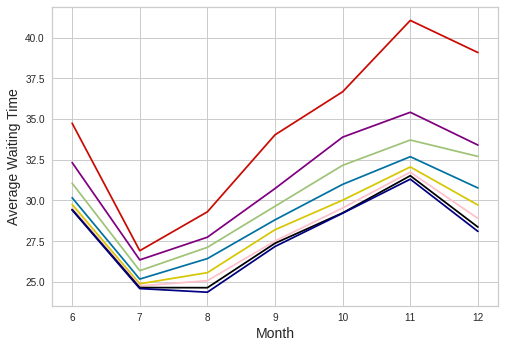

In [ ]:

# Line Graph by matplotlib with wide-form DataFrame

plt.plot(pred_month_final.월	, pred_month_final.실제값, marker='+', color='r')

plt.plot(pred_month_final.월	, pred_month_final.예측값, marker='+', color='purple')

plt.plot(pred_month_final.월	, pred_month_final['10대 증차'], marker='+', color='g')

plt.plot(pred_month_final.월	, pred_month_final['20대 증차'], marker='+', color='b')

plt.plot(pred_month_final.월	, pred_month_final['30대 증차'], marker='+', color='y')

plt.plot(pred_month_final.월	, pred_month_final['40대 증차'], marker='+', color='pink')

plt.plot(pred_month_final.월	, pred_month_final['50대 증차'], marker='+', color='black')

plt.plot(pred_month_final.월	, pred_month_final['60대 증차'], marker='+', color='navy')

# plt.title('장애인 콜택시 증차에 따른 대기시간 예측', fontsize=20) 

plt.ylabel('Average Waiting Time', fontsize=14)

plt.xlabel('Month', fontsize=14)

plt.legend(fontsize=12, loc='best')

plt.show()

In [ ]:
pred_month_final

,월,실제값,예측값,10대 증차,20대 증차,30대 증차,40대 증차,50대 증차,60대 증차
0,6,34.740000,32.325742,31.054064,30.165125,29.756163,29.524288,29.437354,29.415248
1,7,26.912903,26.349487,25.685802,25.170189,24.881141,24.748625,24.649907,24.588514
2,8,29.300000,27.742459,27.120555,26.429056,25.565089,25.072926,24.642279,24.365477
3,9,34.026667,30.729818,29.642226,28.808472,28.202543,27.505517,27.369854,27.172344
4,10,36.670968,33.885485,32.155149,30.986046,30.015824,29.535823,29.234974,29.213055
5,11,41.050000,35.411317,33.707388,32.684252,32.055575,31.735959,31.516905,31.304639
6,12,39.077419,33.397771,32.700090,30.764707,29.717263,28.894800,28.362871,28.098442


In [ ]:
pred_month

,일자,Label,Label_10_up,Label_20_up,Label_30_up,Label_40_up,Label_50_up,Label_60_up,실제값,month
일자,,,,,,,,,,
2021-06-01,2021-06-01,32.173913,31.879098,31.955549,31.955549,31.955549,31.955549,31.955549,34.1,6
2021-06-02,2021-06-02,30.056105,30.132556,30.132556,30.132556,30.132556,30.132556,30.132556,32.1,6
2021-06-03,2021-06-03,42.110353,35.866476,34.242130,33.282275,32.277936,31.934780,32.011232,40.8,6
2021-06-04,2021-06-04,33.178292,31.148650,30.818575,30.609519,30.685970,30.685970,30.685970,34.9,6
2021-06-05,2021-06-05,28.723312,27.814655,26.290213,25.529322,25.572800,25.572800,25.572800,32.2,6
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,2021-12-27,25.520777,24.102000,23.650035,23.678545,23.148706,22.792334,22.705851,38.1,12
2021-12-28,2021-12-28,32.612916,31.114109,28.508221,26.860668,26.096899,25.911609,25.703475,38.1,12
2021-12-29,2021-12-29,35.988922,36.256389,36.446073,35.556849,33.756899,32.676973,32.946738,46.7,12


In [ ]:
pred_month.columns

Index(['일자', 'Label', 'Label_10_up', 'Label_20_up', 'Label_30_up',
       'Label_40_up', 'Label_50_up', 'Label_60_up', '실제값', 'month'],
      dtype='object')

In [ ]:
pred_month = pred_month[['실제값', 'Label', 'Label_10_up', 'Label_20_up', 'Label_30_up',
       'Label_40_up', 'Label_50_up', 'Label_60_up']]

In [ ]:
pred_month

,실제값,Label,Label_10_up,Label_20_up,Label_30_up,Label_40_up,Label_50_up,Label_60_up
일자,,,,,,,,
2021-06-01,34.1,32.173913,31.879098,31.955549,31.955549,31.955549,31.955549,31.955549
2021-06-02,32.1,30.056105,30.132556,30.132556,30.132556,30.132556,30.132556,30.132556
2021-06-03,40.8,42.110353,35.866476,34.242130,33.282275,32.277936,31.934780,32.011232
2021-06-04,34.9,33.178292,31.148650,30.818575,30.609519,30.685970,30.685970,30.685970
2021-06-05,32.2,28.723312,27.814655,26.290213,25.529322,25.572800,25.572800,25.572800
...,...,...,...,...,...,...,...,...
2021-12-27,38.1,25.520777,24.102000,23.650035,23.678545,23.148706,22.792334,22.705851
2021-12-28,38.1,32.612916,31.114109,28.508221,26.860668,26.096899,25.911609,25.703475
2021-12-29,46.7,35.988922,36.256389,36.446073,35.556849,33.756899,32.676973,32.946738


In [ ]:
pred_month.columns =  ['실제값', '예측값', '10대 증차', '20대 증차', '30대 증차', '40대 증차', '50대 증차', '60대 증차']

In [ ]:
pred_month

,실제값,예측값,10대 증차,20대 증차,30대 증차,40대 증차,50대 증차,60대 증차
일자,,,,,,,,
2021-06-01,34.1,32.173913,31.879098,31.955549,31.955549,31.955549,31.955549,31.955549
2021-06-02,32.1,30.056105,30.132556,30.132556,30.132556,30.132556,30.132556,30.132556
2021-06-03,40.8,42.110353,35.866476,34.242130,33.282275,32.277936,31.934780,32.011232
2021-06-04,34.9,33.178292,31.148650,30.818575,30.609519,30.685970,30.685970,30.685970
2021-06-05,32.2,28.723312,27.814655,26.290213,25.529322,25.572800,25.572800,25.572800
...,...,...,...,...,...,...,...,...
2021-12-27,38.1,25.520777,24.102000,23.650035,23.678545,23.148706,22.792334,22.705851
2021-12-28,38.1,32.612916,31.114109,28.508221,26.860668,26.096899,25.911609,25.703475
2021-12-29,46.7,35.988922,36.256389,36.446073,35.556849,33.756899,32.676973,32.946738


In [ ]:
pred_month.to_csv('/content/drive/Shareddrives/2022-01_데이터마이닝이론및응용/0_텀프로젝트/데이터/유진_대기시간예측모델링_일별.csv', encoding='utf-8-sig', index=True)